In [1]:
import sys
sys.path.append("/home/marin/projects/mhac/build/release")
import mhac

In [2]:
%matplotlib inline
import random, copy, math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read_TSP_data(filepath="../../data/tsp/eil51.tsp"):
    cities = mhac.problems.tsp.Cities()

    with open(filepath, 'r') as infile:
        Name = infile.readline().strip().split()[1]
        FileType = infile.readline().strip().split()[1]
        Comment = infile.readline().strip().split()[1]
        Dimension = infile.readline().strip().split(":")[1]
        EdgeWeightType = infile.readline().strip().split()[1]
        infile.readline()

        for i in range(int(Dimension)):
            coords = infile.readline().strip().split()[1:]
            city = mhac.problems.tsp.City(int(coords[0]), int(coords[1]))
            cities.append(city)

    return cities

In [4]:
def displayTour(cities, solution):
    plt.figure(figsize = (16,8))
    N = len(cities)

    plt.axes()
    plt.plot([cities[solution[i % N]].x for i in range(N+1)], [cities[solution[i % N]].y for i in range(N+1)], 'bo-')
    plt.show()

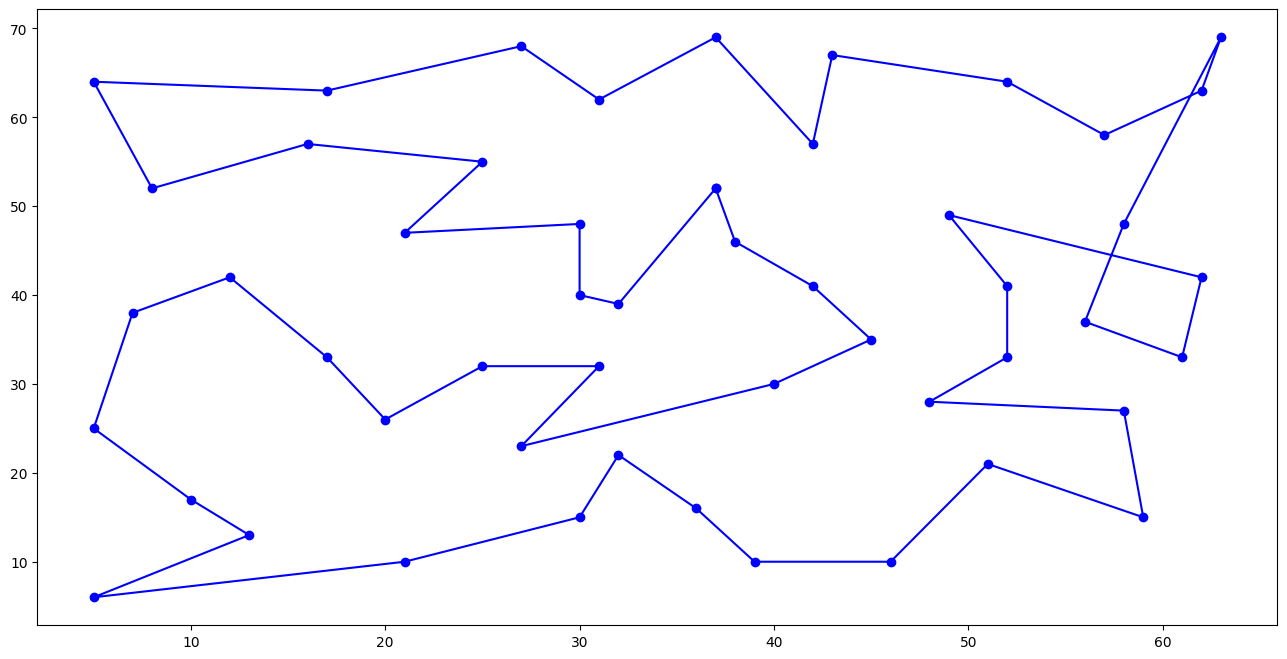

478.66082763671875

In [8]:
problem = mhac.problems.tsp.ACO_TSP(read_TSP_data())
ACO = mhac.swarm.AntColonyOptimization(problem)
sol = ACO.solve(500, 50, 0.7, 0.7, 0.25)
displayTour(problem.cities, sol.tour)
sol.cost

In [6]:
sol.tour

VectorInt[0, 50, 45, 4, 48, 9, 38, 29, 33, 49, 20, 28, 19, 34, 35, 2, 27, 30, 47, 5, 13, 24, 3, 17, 46, 11, 22, 6, 25, 7, 26, 10, 37, 8, 32, 44, 14, 16, 43, 41, 18, 40, 12, 39, 36, 15, 1, 21, 31, 23, 42]

In [7]:
assert len(sol.tour) == len(set(sol.tour)), "Solution tour has duplicates"